In [686]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)
from ipywidgets import interact
from plotly.offline import init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import pandas as pd

init_notebook_mode(connected=True)

def ct_viewer(im):
    def plot_image(myslice):
        plt.imshow(im[myslice], cmap=plt.cm.jet)
    interact(plot_image, myslice=(0, im.shape[0]))
    return; 

In [798]:
energy='6e'
heter='lung'
name=energy+'_'+heter


#________from result_________
#dose
#im=sitk.ReadImage('/home/gate/Documents/phd/work/gateTrueBeamModel/tb/fullCreator/results/'+name+'/media/'+name+'.mhd')
#uncertainty
#im=sitk.ReadImage('/home/gate/Documents/phd/work/gateTrueBeamModel/tb/fullCreator/results/'+name+'/water/'+name+'.W.total_RelativeUncertainty.mhd')
#_________________________





#________from jp data/image_________ --> res 2.5
#dose
#im=sitk.ReadImage('/home/gate/Documents/phd/data/JupyterNotebook/image/estro/res2.5/'+energy+'/media/'+name+'.mhd')
#uncertainty
#im=sitk.ReadImage('/home/gate/Documents/phd/data/JupyterNotebook/image/estro/res2.5/'+energy+'/media/'+name+'.total_RelativeUncertainty.mhd')
#___________________________________

#________from jp data/image_________ --> res1
#dose
im=sitk.ReadImage('/home/gate/Documents/phd/data/JupyterNotebook/image/estro/res1/'+energy+'/'+name+'.mhd')
#uncertainty
#im=sitk.ReadImage('/home/gate/Documents/phd/data/JupyterNotebook/image/estro/res1/'+energy+'/'+name+'.total_AbsoluteUncertainty.mhd')
#___________________________________

#________from jp data/image_________ --> res0.5
#dose
#im=sitk.ReadImage('/home/gate/Documents/phd/data/JupyterNotebook/image/estro/res0.5/'+energy+'/'+name+'.mhd')
#uncertainty
#im=sitk.ReadImage('/home/gate/Documents/phd/data/JupyterNotebook/image/estro/res1/'+energy+'/'+name+'.total_AbsoluteUncertainty.mhd')
#___________________________________
pix=sitk.GetArrayFromImage(im)

print('origin: ', im.GetOrigin())
print('spacing: ',im.GetSpacing())
print('size: ', im.GetSize())

ct_viewer(pix)

origin:  (-99.0, 50.5, -99.0)
spacing:  (2.0, 1.0, 2.0)
size:  (100, 100, 100)


interactive(children=(IntSlider(value=50, description='myslice'), Output()), _dom_classes=('widget-interact',)…

79
(100, 100)


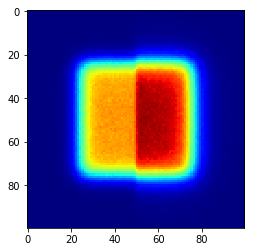

In [799]:
depth=20

depthim=int(((im.GetSize()[1]-1)-round(depth/im.GetSpacing()[1])))
print(depthim)

myslice=pix[:, depthim, :]
plt.imshow(myslice, cmap=plt.cm.jet)

y=myslice[int(im.GetSize()[0]/2),:]
print(myslice.shape)
#y=np.flipud(y)

x=np.arange(0,y.shape[0])
x=x*im.GetSpacing()[0]
x=x-(x.max()/2)

trace=np.column_stack((x,y))

In [800]:
data= Scatter(x = x,
               y = y,
               name='cross',
               mode = 'lines+markers')
fig = dict(data=[data])
iplot(fig)

In [801]:
#np.savetxt('/home/gate/Documents/phd/data/JupyterNotebook/gammaIndex/estro2018/study/media/'+energy+'/'+name+str(depth)+'gate.csv', trace, delimiter=',', header='step,value', comments='')
#np.savetxt('/home/gate/Documents/phd/data/JupyterNotebook/gammaIndex/estro2018/study/water/'+energy+'/'+name+str(depth)+'_uncertainty_W_gate.csv', trace, delimiter=',', header='step,value', comments='')

#dose
np.savetxt('/home/gate/Documents/phd/data/JupyterNotebook/gammaIndex/estro2018/study/media/'+energy+'/gate/dax/res'+str(im.GetSpacing()[1])+'/'+name+str(depth)+'_gate_res'+str(im.GetSpacing()[1])+'.csv', trace, delimiter=',', header='step,value', comments='')
#uncertainty
#np.savetxt('/home/gate/Documents/phd/data/JupyterNotebook/gammaIndex/estro2018/study/media/'+energy+'/gate/dax/res'+str(im.GetSpacing()[1])+'/'+name+str(depth)+'_gate_res'+str(im.GetSpacing()[1])+'_uncertainty.csv', trace, delimiter=',', header='step,value', comments='')